In [1]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-05-10 16:49:25--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M   282KB/s    in 24s     

2023-05-10 16:49:53 (137 KB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [5]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
df_ = pd.read_csv("AirlineTweets.csv")

In [9]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
df = df_[["airline_sentiment",'text']].copy()

In [11]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

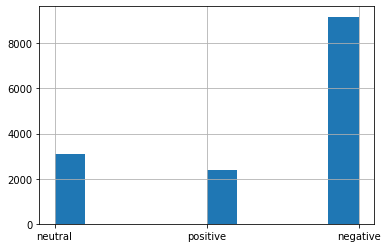

In [12]:
df['airline_sentiment'].hist()

In [13]:
target_map = {'positive':1, 'negative': 0, 'neutral':2}
df['target'] = df['airline_sentiment'].map(target_map)

In [14]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [16]:
df_train, df_test = train_test_split(df)

In [17]:
df_train.head()

,airline_sentiment,text,target
4148,negative,@united here I was thinking how I could say so...,0
14166,negative,@AmericanAir fight got Cancelled Flighted can ...,0
5909,positive,@SouthwestAir Thank you. Great tool,1
2470,negative,.@united too much info to share via tweet. Ple...,0
4652,negative,@SouthwestAir but when do I get my gin &amp; t...,0


In [18]:
vectorizer = TfidfVectorizer(max_features = 2000)

In [19]:
X_train = vectorizer.fit_transform(df_train['text'])

In [20]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157738 stored elements in Compressed Sparse Row format>

In [33]:
X_test = vectorizer.transform(df_test['text'])
Y_train = df_train['target']
Y_test = df_test['target']

In [34]:
model = LogisticRegression(max_iter = 500)
model.fit(X_train, Y_train)
print("Train acc:",model.score(X_train,Y_train))
print("Test acc:",model.score(X_test,Y_test))

Train acc: 0.8561020036429873
Test acc: 0.5598360655737705


In [35]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class ='ovo'))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class ='ovo'))

Train AUC: 0.942722368604651
Test AUC: 0.5619679315800941


In [36]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [37]:
cm = confusion_matrix(Y_train, P_train, normalize = 'true')
cm

array([[0.96344648, 0.00899333, 0.0275602 ],
       [0.19360366, 0.71216448, 0.09423187],
       [0.30492505, 0.04796574, 0.64710921]])

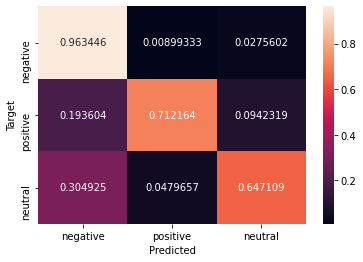

In [38]:
def plot_cm(cm):
    classes = ['negative','positive','neutral']
    df_cm = pd.DataFrame(cm, index = classes, columns = classes)
    ax = sn.heatmap(df_cm, annot = True,fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
plot_cm(cm)

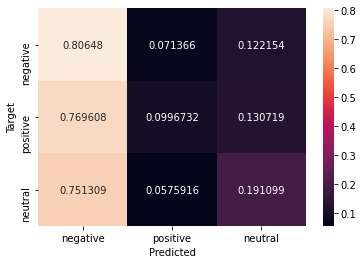

In [39]:
cm_test = confusion_matrix(Y_test, P_test, normalize = 'true')
plot_cm(cm_test)

# Binary Labels 

In [40]:
binary_target_list= [target_map['positive'],target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [41]:
df_b_train.head()

,airline_sentiment,text,target
4148,negative,@united here I was thinking how I could say so...,0
14166,negative,@AmericanAir fight got Cancelled Flighted can ...,0
5909,positive,@SouthwestAir Thank you. Great tool,1
2470,negative,.@united too much info to share via tweet. Ple...,0
4652,negative,@SouthwestAir but when do I get my gin &amp; t...,0


In [42]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [43]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [45]:
model = LogisticRegression(max_iter = 500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train,Y_train))
print("Test acc:", model.score(X_test,Y_test))

Train acc: 0.929091960670908
Test acc: 0.9105662983425414
